In [1]:
from bw_temporalis import TemporalDistribution as TD, TemporalisLCA, Timeline
import bw2data as bd
import bw2calc as bc
import bw2speedups
import bw_graph_tools as graph
import bw_temporalis as bwt
import numpy as np
import pandas as pd

In [2]:
bd.projects.set_current("Temporalis example project")

In [3]:
bd.Database('temporalis-example').write({
    ('temporalis-example', "CO2"): {
        "type": "emission",
        "name": "carbon dioxide",
        "temporalis code": "co2",
    },
    ('temporalis-example', "CH4"): {
        "type": "emission",
        "name": "methane",
        "temporalis code": "ch4",
    },
    ('temporalis-example', 'Functional Unit'): {
        'name': 'Functional Unit',
        'exchanges': [
            {
                'amount': 5,
                'input': ('temporalis-example', 'EOL'),
                'temporal_distribution': TD(
                    np.array([0, 1, 2, 3, 4], dtype='timedelta64[Y]') ,
                    np.array([1.0, 1.0, 1.0, 1.0, 1.0])
                ),
                'type': 'technosphere'
            },
        ],
    },
    ('temporalis-example', 'EOL'): {
        'exchanges': [
            {
                'amount': 0.8,
                'input': ('temporalis-example', 'Waste'),
                'type': 'technosphere'
            },
            {
                'amount': 0.2,
                'input': ('temporalis-example', 'Landfill'),
                'type': 'technosphere'
            },
            {
                'amount': 1,
                'input': ('temporalis-example', 'Use'),
                'type': 'technosphere'
            },
        ],
        'name': 'EOL',
        'type': 'process'
    },
    ('temporalis-example', 'Use'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('temporalis-example', 'Production'),
                'temporal_distribution': TD(
                    np.array([4], dtype='timedelta64[M]'),
                    np.array([1.0])
                ),
                'type': 'technosphere'
            },
        ],
        'name': 'Use',
    },
    ('temporalis-example', 'Production'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('temporalis-example', 'Transport'),
                'temporal_distribution': TD(
                    np.array([200],dtype='timedelta64[D]'),
                    np.array([1.0])
                ),
                'type': 'technosphere'
            },
        ],
        'name': 'Production',
        'type': 'process'
    },
    ('temporalis-example', 'Transport'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('temporalis-example', 'Sawmill'),
                'type': 'technosphere'
            },
            {
                'amount': 0.1,
                'input': ('temporalis-example', 'CO2'),
                'type': 'biosphere'
            },
        ],
        'name': 'Production',
        'type': 'process'
    },
    ('temporalis-example', 'Sawmill'): {
        'exchanges': [
            {
                'amount': 1.2,
                'input': ('temporalis-example', 'Forest'),
                'temporal_distribution': TD(
                    np.array([14], dtype='timedelta64[M]'),
                    np.array([1.2])
                ),
                'type': 'technosphere'
            },
            {
                'amount': 0.1,
                'input': ('temporalis-example', 'CO2'),
                'type': 'biosphere'
            },
        ],
        'name': 'Sawmill',
        'type': 'process'
    },
    ('temporalis-example', 'Forest'): {
        'exchanges': [
            {
                'amount': -.2 * 6,
                'input': ('temporalis-example', 'CO2'),
                'temporal_distribution': TD(
                    np.array([-4, -3, 0, 1, 2, 5], dtype='timedelta64[Y]'),
                    np.array([-.2]*6)
                ),
                'type': 'biosphere'
            },
            {
                'amount': 1.5,
                'input': ('temporalis-example', 'Thinning'),
                'temporal_distribution': TD(
                    np.array([-3, 0, 1], dtype='timedelta64[Y]'),
                    np.array([.5] * 3)
                ),
                'type': 'technosphere'
            },
        ],
        'name': 'Forest',
    },
    ('temporalis-example', 'Thinning'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('temporalis-example', 'Thinning'),
                'type': 'production'
            },
            {
                'amount': 1,
                'input': ('temporalis-example', 'Avoided impact - thinnings'),
                'type': 'production'
            },
        ],
        'name': 'Thinning',
        'type': 'process'
    },
    ('temporalis-example', 'Landfill'): {
        'exchanges': [
            {
                'amount': 0.1,
                'input': ('temporalis-example', 'CH4'),
                'temporal_distribution': TD(
                    np.array([10, 20, 40, 60], dtype='timedelta64[M]'),
                    np.array([0.025] * 4)
                ),
                'type': 'biosphere'
            },
        ],
        'name': 'Landfill',
        'type': 'process'
    },
    ('temporalis-example', 'Waste'): {
        'exchanges': [
            {
                'amount': 1,
                'input': ('temporalis-example', 'Waste'),
                'type': 'production'
            },
            {
                'amount': 1,
                'input': ('temporalis-example', 'Avoided impact - waste'),
                'type': 'production'
            },
        ],
        'name': 'Waste',
        'type': 'process'
    },
    ('temporalis-example', 'Avoided impact - waste'): {
        'exchanges': [
            {
                'amount': -0.6,
                'input': ('temporalis-example', 'CO2'),
                'type': 'biosphere'
            },
            {
                'amount': 1,
                'input': ('temporalis-example', 'Avoided impact - waste'),
                'type': 'production'
            },
        ],
        'name': 'Avoided impact - waste',
        'type': 'process'
    },
    ('temporalis-example', 'Avoided impact - thinnings'): {
        'exchanges': [
            {
                'amount': -0.2,
                'input': ('temporalis-example', 'CO2'),
                'type': 'biosphere'
            },
            {
                'amount': 1,
                'input': ('temporalis-example', 'Avoided impact - thinnings'),
                'type': 'production'
            },
        ],
        'name': 'Avoided impact - thinnings',
        'type': 'process'
    }
})

Writing activities to SQLite3 database:


Not able to determine geocollections for all datasets. This database is not ready for regionalization.


0% [##############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 04/27/2023 14:06:41
  Finished: 04/27/2023 14:06:41
  Total time elapsed: 00:00:00
  CPU %: 103.80
  Memory %: 0.96


In [4]:
bd.Method(("GWP", "example")).write([
    (('temporalis-example', "CO2"), 1),
    (('temporalis-example', "CH4"), 25),
])

In [5]:
lca = bc.LCA({('temporalis-example', 'EOL'): 1}, ("GWP", "example"))
lca.lci()
lca.lcia()

In [6]:
lca = TemporalisLCA(lca)

Starting graph traversal
After first heuristic:
[ 0  1  2  3  4  5  6  7  8  9 10 11] [ 0  1  2  3  4  5  6  7  8  9 10 11]
Calculation count: 21


In [7]:
tl = lca.build_timeline()

In [8]:
tl.build_dataframe()

In [9]:
tl.df

,date,amount,flow,activity
0,2023-04-27,0.02,9,18
1,2023-04-27,-0.48,8,20
2,2023-04-27,0.10,8,14
3,2023-04-27,0.10,8,15
4,2023-04-27,-1.44,8,16
5,2023-04-27,-0.36,8,21


<Axes: xlabel='date', ylabel='amount'>

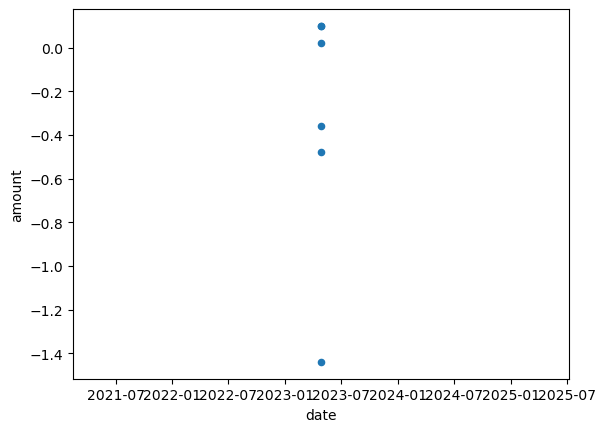

In [14]:
tl.df.plot(x="date", y="amount", kind="scatter")

In [15]:
def linear_characterization(series, period=100):
    date = (
        series.date.to_numpy() + 
        np.arange(period, dtype="timedelta64[Y]").astype("timedelta64[s]")
    )
    amount = np.linspace(1, 0, period) * series['amount']
    return pd.DataFrame({
        'date': date.astype("datetime64[s]"),
        'amount': amount,
        'flow': series.flow,
        'activity': series.activity,
    })


In [16]:
characterized_df = tl.characterize_dataframe(
    characterization_function=linear_characterization, 
    flow={bd.get_node(name="carbon dioxide").id}
)

<Axes: xlabel='date'>

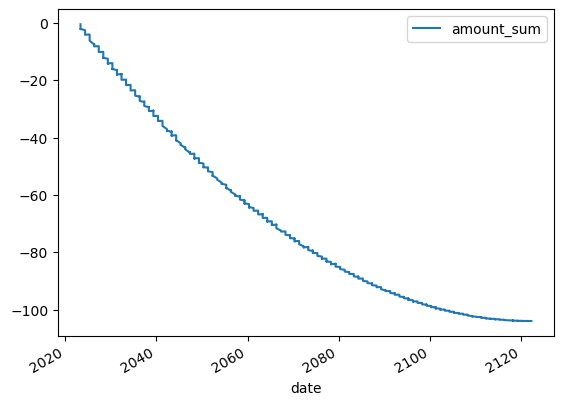

In [17]:
characterized_df.plot(x="date", y="amount_sum")